## 1. Methode : Regressionsbaum

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Laden des Datensatzes
df = pd.read_csv('/users/tobiaswachtel/Documents/GitHub/Data_Mining_WB_DBU/hotel_bookings_processed.csv')
# df = df.drop('Unnamed: 0', axis=1)


# Entfernen von Spalten mit Dataleakage also spalten, die nicht für die Vorhersage verwendet werden können
notinuse_col =['reservation_status_date',
               'arrival_date_year',
               'arrival_date_month',
               'arrival_date_week_number', 
               'assigned_room_type',
               'reservation_status']

df.drop(notinuse_col, axis = 1, inplace = True)


categorical_cols = [col for col in df.columns if df[col].dtype == 'O']


# One-hot encoding for categorical variables
for var in categorical_cols:
    dummies = pd.get_dummies(df[var], prefix=var)
    df = pd.concat([df, dummies], axis=1)
    df.drop(var, axis=1, inplace=True)  


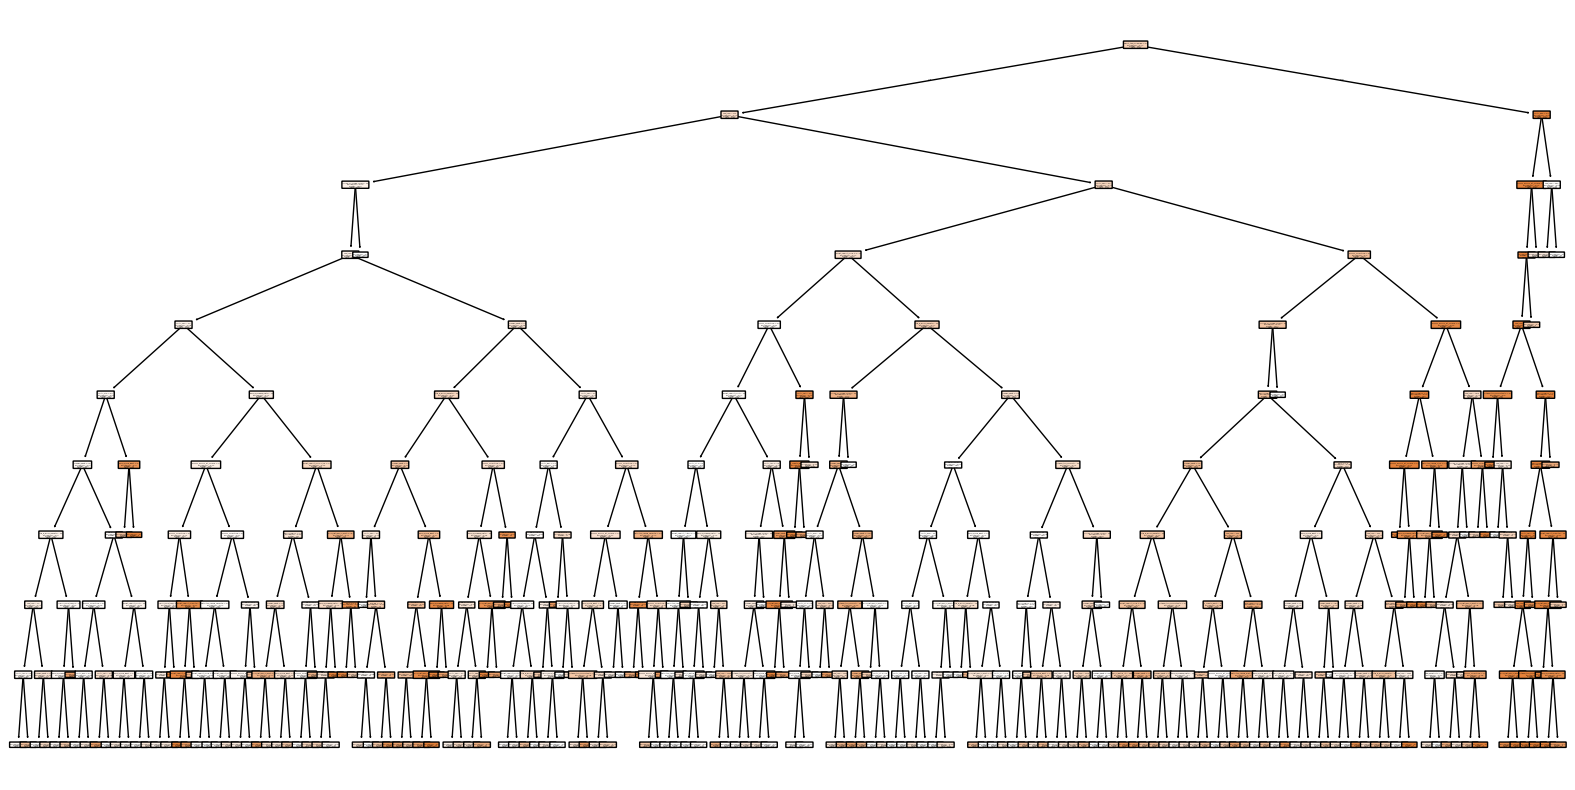

In [3]:
# Features und Zielvariable definieren
X = df.drop('is_canceled', axis=1)  # Ersetzen Sie 'target_column' durch den Namen der Zielvariable
y = df['is_canceled']  # Ersetzen Sie 'target_column' durch den Namen der Zielvariable

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressionsbaum initialisieren
regressor = DecisionTreeRegressor(random_state=42)

# Hyperparameter-Tuning mit GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Bestes Modell auswählen
best_regressor = grid_search.best_estimator_

# Modell auf den Trainingsdaten trainieren
best_regressor.fit(X_train, y_train)

# Regressionsbaum darstellen
plt.figure(figsize=(20, 10))
plot_tree(best_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()